#Stock Market Price Prediction

Due to the pandemic worldwide, a lot of people got the first time in touch with the stock market, just as us. According to several research portals, millions of people made their first investment during the pandemic. There are several reasons for that. One is that the market was oversold due to panic and uncertainness regarding the corona virus. The stock market crashed and there was a real chance to invest in companies for a cheap stock price.

Thanks to the easy given access to online trading platform even mobile access, it is an attractive option to trade stocks part time from everywhere and at any time. In order to make our decisions based on more information, data and mathematically calculations we choose this project in the data-science module to make sure our future invests are profitable.



Hypotheses and questions asked:

The companies Microsoft, Google (Alphabet) and Tesla are all big software companies. 
**We assume the correlation between these companies as high since they all have a high market capitalization and work in the same field** – even if Tesla is known as a car company, they collect and process a lot of data in order to create their autonomous driving cars.
**We want to investigate which timeframe is the most accurate for the predictions**. Is it more accurate to predict the next two days or the next month?






#Project Goal

To start learning and analyzing stocks, we will start off by taking a quick look at the historical stocks prices. This will be done by extracting latest stocks data from pandas web-data reader and Yahoo Finance. Then we will try to view the data through exploratory analysis such as correlation heatmap, matplotlib visualization, and prediction analysis using Linear Analysis, Decision Trees, Random Forest and Multi-layer Perceptron regressor.

We want to be able to predict the future chart-flow of the stocks as precise as possible. We will create the predictions in three different timeframes. The first one will be for the next two days. The second one, we will try to predict the next week based on different models and calculations. The third timeframe includes the whole next month which we want to predict and calculate the return of investments.



# Import Necessary Libraries
**We will use Panadas and Numpy as the core data science libraries, while matplotlib seaborn is used for data visualization. Yfinance library is used to extract stock data from our source API yahoo finance**

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 6.4 MB 48.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

import yfinance as yf  # We will use this library to upload latest data from Yahoo API
import pandas_datareader as pdr
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:

NUM_DAYS = 1000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) ) #create start date
end = datetime.datetime.today()

In [4]:
pip install fix_yahoo_finance #library to fix any error accuring in yfinace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Stock market price from **Google(GOOG), Tesla(TSLA) and Microsoft(MSFT)**

In [5]:
tickers = ['GOOG','MSFT','TSLA'] # tickers for microsoft google and tesla on tickers
df= yf.download(tickers,'2019-01-01','2022-05-31') #time period for which data will be loaded


[*********************100%***********************]  3 of 3 completed


In [6]:
df.head()

Adj Close                              Close              \
                   GOOG       MSFT       TSLA         GOOG        MSFT   
Date                                                                     
2019-01-02  1045.849976  97.353897  62.023998  1045.849976  101.120003   
2019-01-03  1016.059998  93.772453  60.071999  1016.059998   97.400002   
2019-01-04  1070.709961  98.133736  63.537998  1070.709961  101.930000   
2019-01-07  1068.390015  98.258896  66.991997  1068.390015  102.059998   
2019-01-08  1076.280029  98.971344  67.070000  1076.280029  102.800003   

                              High                                 Low  \
                 TSLA         GOOG        MSFT       TSLA         GOOG   
Date                                                                     
2019-01-02  62.023998  1052.319946  101.750000  63.026001  1015.710022   
2019-01-03  60.071999  1056.979980  100.190002  61.880001  1014.070007   
2019-01-04  63.537998  1070.839966  102.510002  63.599998  1027.417969   
2019-01-07  66.991997  1074.000000  103.269997  67.348000  1054.760010   
2019-01-08  67.070000  1084.560059  103.970001  68.802002  1060.530029   

                                          Open                         \
                  MSFT       TSLA         GOOG        MSFT       TSLA   
Date                                                                    
2019-01-02   98.940002  59.759998  1016.570007   99.550003  61.220001   
2019-01-03   97.199997  59.476002  1041.000000  100.099998  61.400002   
2019-01-04   98.930000  60.546001  1032.589966   99.720001  61.200001   
2019-01-07  100.980003  63.549999  1071.500000  101.639999  64.344002   
2019-01-08  101.709999  65.403999  1076.109985  103.040001  68.391998   

             Volume                      
               GOOG      MSFT      TSLA  
Date                                     
2019-01-02  1532600  35329300  58293000  
2019-01-03  1841100  42579100  34826000  
2019-01-04  2093900  44060600  36970500  
2019-01-07  1981900  35656100  37756000  
2019-01-08  1764900  31514400  35042500

In [7]:
df_google = yf.download('GOOG', start=start, end=end, interval=INTERVAL) # download google data
df_msft = yf.download('MSFT', start=start, end=end, interval=INTERVAL)# download microsoft data
df_tsla = yf.download('TSLA', start=start, end=end, interval=INTERVAL) # download Tesla data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Google data is loaded using yahoo finance library**

# Data Exploration
**This section includes general information of the dataset, number of features, num of datapoints, datatypes of the dataset we will sample it down to a manageable size to work with**

In [8]:
df.head() # first five data points of combined data for all three stocks 

Adj Close                              Close              \
                   GOOG       MSFT       TSLA         GOOG        MSFT   
Date                                                                     
2019-01-02  1045.849976  97.353897  62.023998  1045.849976  101.120003   
2019-01-03  1016.059998  93.772453  60.071999  1016.059998   97.400002   
2019-01-04  1070.709961  98.133736  63.537998  1070.709961  101.930000   
2019-01-07  1068.390015  98.258896  66.991997  1068.390015  102.059998   
2019-01-08  1076.280029  98.971344  67.070000  1076.280029  102.800003   

                              High                                 Low  \
                 TSLA         GOOG        MSFT       TSLA         GOOG   
Date                                                                     
2019-01-02  62.023998  1052.319946  101.750000  63.026001  1015.710022   
2019-01-03  60.071999  1056.979980  100.190002  61.880001  1014.070007   
2019-01-04  63.537998  1070.839966  102.510002  63.599998  1027.417969   
2019-01-07  66.991997  1074.000000  103.269997  67.348000  1054.760010   
2019-01-08  67.070000  1084.560059  103.970001  68.802002  1060.530029   

                                          Open                         \
                  MSFT       TSLA         GOOG        MSFT       TSLA   
Date                                                                    
2019-01-02   98.940002  59.759998  1016.570007   99.550003  61.220001   
2019-01-03   97.199997  59.476002  1041.000000  100.099998  61.400002   
2019-01-04   98.930000  60.546001  1032.589966   99.720001  61.200001   
2019-01-07  100.980003  63.549999  1071.500000  101.639999  64.344002   
2019-01-08  101.709999  65.403999  1076.109985  103.040001  68.391998   

             Volume                      
               GOOG      MSFT      TSLA  
Date                                     
2019-01-02  1532600  35329300  58293000  
2019-01-03  1841100  42579100  34826000  
2019-01-04  2093900  44060600  36970500  
2019-01-07  1981900  35656100  37756000  
2019-01-08  1764900  31514400  35042500

In [9]:
df.tail() # last five points

Adj Close                                Close              \
                   GOOG        MSFT        TSLA         GOOG        MSFT   
Date                                                                       
2022-05-23  2233.330078  260.649994  674.900024  2233.330078  260.649994   
2022-05-24  2118.520020  259.619995  628.159973  2118.520020  259.619995   
2022-05-25  2116.790039  262.519989  658.799988  2116.790039  262.519989   
2022-05-26  2165.919922  265.899994  707.729980  2165.919922  265.899994   
2022-05-27  2255.979980  273.239990  759.630005  2255.979980  273.239990   

                               High                                  Low  \
                  TSLA         GOOG        MSFT        TSLA         GOOG   
Date                                                                       
2022-05-23  674.900024  2240.110107  261.500000  679.960022  2183.084961   
2022-05-24  628.159973  2127.899902  261.329987  653.919983  2044.160034   
2022-05-25  658.799988  2130.894043  264.579987  669.320007  2084.225098   
2022-05-26  707.729980  2179.104980  267.109985  718.669983  2109.760010   
2022-05-27  759.630005  2257.360107  273.339996  759.799988  2191.000000   

                                           Open                          \
                  MSFT        TSLA         GOOG        MSFT        TSLA   
Date                                                                      
2022-05-23  253.429993  638.059998  2202.080078  255.490005  655.020020   
2022-05-24  253.500000  620.570007  2127.550049  257.890015  653.530029   
2022-05-25  257.130005  623.010010  2102.840088  258.140015  623.849976   
2022-05-26  261.429993  653.659973  2121.010010  262.269989  661.419983   
2022-05-27  267.559998  720.530029  2195.770020  268.480011  723.250000   

             Volume                      
               GOOG      MSFT      TSLA  
Date                                     
2022-05-23  1577900  33175400  29634500  
2022-05-24  3019300  29043900  29697500  
2022-05-25  1895000  28547900  30713100  
2022-05-26  1514400  25002100  35334400  
2022-05-27  1495600  26889500  29630300

In [10]:
len(df) #len of dataset/ datapoints/ num of days

859

In [11]:
df.shape #shape of the combined dataframe

(859, 18)

In [12]:
df.dtypes # datatypes of each column

Adj Close  GOOG    float64
           MSFT    float64
           TSLA    float64
Close      GOOG    float64
           MSFT    float64
           TSLA    float64
High       GOOG    float64
           MSFT    float64
           TSLA    float64
Low        GOOG    float64
           MSFT    float64
           TSLA    float64
Open       GOOG    float64
           MSFT    float64
           TSLA    float64
Volume     GOOG      int64
           MSFT      int64
           TSLA      int64
dtype: object

## Data Cleaning
**Checking for null values and fill na if any are there**

In [13]:
df.isnull().sum() # code to check num of null values for each clumn in dataframe

Adj Close  GOOG    0
           MSFT    0
           TSLA    0
Close      GOOG    0
           MSFT    0
           TSLA    0
High       GOOG    0
           MSFT    0
           TSLA    0
Low        GOOG    0
           MSFT    0
           TSLA    0
Open       GOOG    0
           MSFT    0
           TSLA    0
Volume     GOOG    0
           MSFT    0
           TSLA    0
dtype: int64

In [14]:
df.info() #informtaion of each colummn

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 859 entries, 2019-01-02 to 2022-05-27
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  859 non-null    float64
 1   (Adj Close, MSFT)  859 non-null    float64
 2   (Adj Close, TSLA)  859 non-null    float64
 3   (Close, GOOG)      859 non-null    float64
 4   (Close, MSFT)      859 non-null    float64
 5   (Close, TSLA)      859 non-null    float64
 6   (High, GOOG)       859 non-null    float64
 7   (High, MSFT)       859 non-null    float64
 8   (High, TSLA)       859 non-null    float64
 9   (Low, GOOG)        859 non-null    float64
 10  (Low, MSFT)        859 non-null    float64
 11  (Low, TSLA)        859 non-null    float64
 12  (Open, GOOG)       859 non-null    float64
 13  (Open, MSFT)       859 non-null    float64
 14  (Open, TSLA)       859 non-null    float64
 15  (Volume, GOOG)     859 non-null    int64  
 16  (Volume

**We can see that there are no null values, similarly we don't have any formating error so data we have can be considered as cleaned**

# Data Visualizations
**Now that the data we have is cleaned. We are gonna visualize it to have a better understanding of the price at the specific date.**

<Figure size 864x576 with 0 Axes>

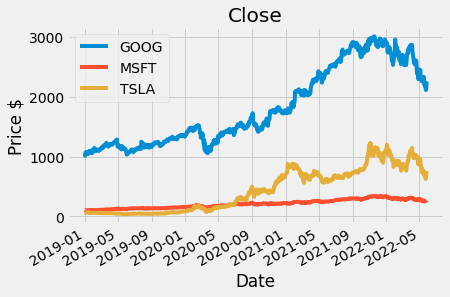

In [15]:
close_df=df['Close']
plt.figure(figsize=(12,8))
close_df.plot()
plt.title('Close')
plt.ylabel('Price $')
plt.show()

**Above graph we can clearly see that GOOG has the highest market closes, TSLA touches the lowest price of GOOG at its highest, MSFT has low closing rates, but after may 2020, every stock has increasing trends which shows that the impact of covid is reducing on the economies.
since 2022 the market is in a downtrend**

<Figure size 864x576 with 0 Axes>

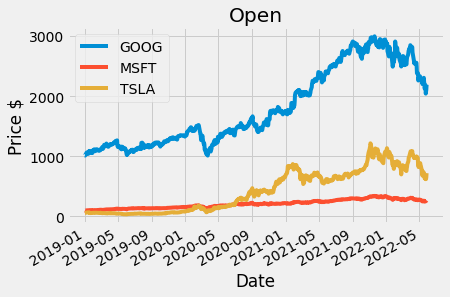

In [16]:
close_df=df['Low']
plt.figure(figsize=(12,8))
close_df.plot()
plt.title('Open')
plt.ylabel('Price $')
plt.show()

**The open price is considered as, at which point the market opens today**

**Google has higher stock value compared to Tesla and Microsoft, Tesla passes the Microsoft at the mid of 2020, Covid 19 has high impact on the businesses , which can be observed on the above stocks as well, after 2019 covid year stock prices seems raising again due to lesser impact of covid 19 and its effects.**

**Now we are going to take a look at the Volume of the three stocks. The Volume measures the number of shares traded in a stock. Volume can indicate market strength, as rising markets on increasing volume are typically viewed as strong and healthy. When prices fall on increasing volume, the trend is gathering strength to the downside, which leads to a downtrend.**

<Figure size 864x576 with 0 Axes>

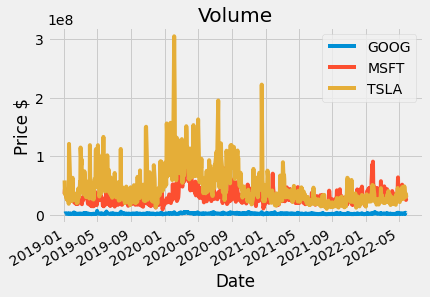

In [17]:
close_df=df['Volume']
plt.figure(figsize=(12,8))
close_df.plot()
plt.title('Volume')
plt.ylabel('Price $')
plt.show()

**As we can see TSLA has higher volume compared to MSFT and GOOG. The lowest volume has GOOG. Here the volume is represented in 10^8 Dollar.
The increase in Tesla's stock price and market cap has created a financial complex of investment products that include or track the electric car maker's stock.**
**Tesla's entry into the S&P 500 Stock (the 500 best companies from US) in December 2020 has further exposed funds tracking the index to the company's stock, and they have reaped the rewards of its price run-up and therefore it went up to alsmost to 300M$.**

Text(0.5, 1.0, 'Coorelation Plot Google')

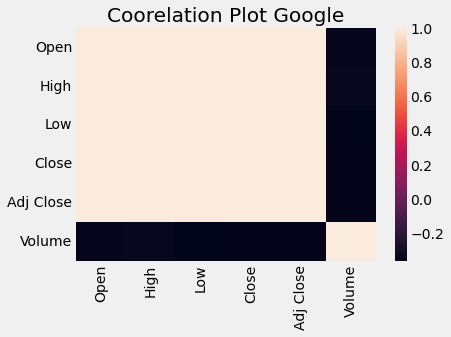

In [18]:
sns.heatmap(df_google.corr()) #correlation plot google
plt.title('Coorelation Plot Google')

Text(0.5, 1.0, 'Correlation Plot MSFT')

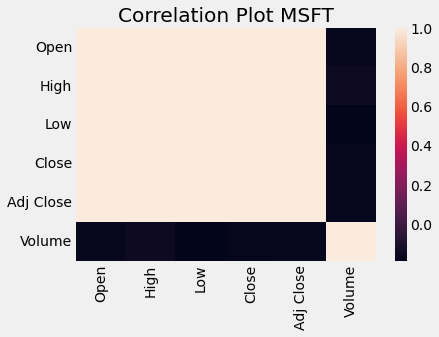

In [19]:
sns.heatmap(df_msft.corr())#corr plot microsoft
plt.title('Correlation Plot MSFT')

Text(0.5, 1.0, 'Correlation Plot TSLA')

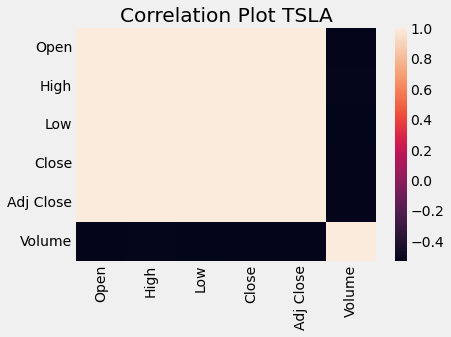

In [20]:
sns.heatmap(df_tsla.corr())#correlation plot tesla
plt.title('Correlation Plot TSLA')

**From above in the three correlation plots it can be observed that for all three datasets no features at all are higly correlated with each other, where the correlated value is one, volume has very little negative correlation, it make sense as low and high and close and adjacent close would definitely be correlated, close depends on the opening prices of the day, thats why it gives high correlation**

In [21]:

corr = close_df.corr() #correlation for close all companies. IN DIFFERENT FORMAT
corr.style.background_gradient(cmap='coolwarm')

,GOOG,MSFT,TSLA
GOOG,1.000000,0.655517,0.383143
MSFT,0.655517,1.000000,0.357417
TSLA,0.383143,0.357417,1.000000


Text(0.5, 1.0, 'Correlation of all three stocks')

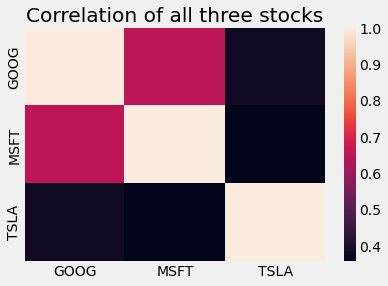

In [22]:
sns.heatmap(close_df.corr())
plt.title('Correlation of all three stocks')

**The graph above represents the Correlation between the differnt stocks , correlation of 1 means high correlations between the stock, while 0 means no correlation, and negative correlation means features are negatively correlated , i.e increase in one feature results in the decrease of other feature. primarlary no stock should have effect on the other but here we can see a high correlation between MSFT and GOOG, similarly TSLA and MSFT as well.**

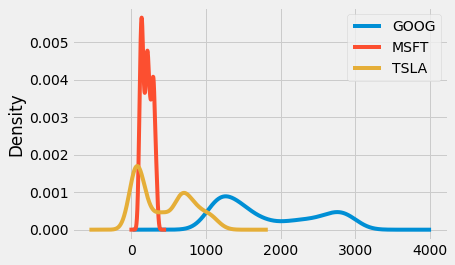

In [23]:
df['Close'].plot(kind='kde') #distribution plot all companies closes

**Microsoft has small spread of its closing price which shows its value didn't change much, while GOOG has the highest spread which shows its varying value with time which is growing periodically, tesla also has a significant spread in the density graph which shows its growth in the last couple of years**

## Feature Transformation
**Feature transformation will be done to convert closing price into mean value of last 10 days, we use pandas ta library to get the means per last 10 days**

In [24]:
pip install pandas_ta #INSTALL pandas ta library which is used to get rolling means, we will get 10 days means.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 29.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=7b75052333f32d71689da73757d79a7026042f9344ffbf09f35995d5a8ef92cd
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [25]:
#lenght 10 filter is used to get 10 days mean close 
import pandas_ta
df_google.ta.ema(close='close', length=10, append=True) 
df_google = df_google.iloc[10:]

In [26]:
df_google

,Open,High,Low,Close,Adj Close,Volume,EMA_10
Date,,,,,,,
2019-09-19,1232.060059,1244.439941,1232.020020,1238.709961,1238.709961,996000,1224.511290
2019-09-20,1233.119995,1243.319946,1223.079956,1229.930054,1229.930054,2270000,1225.496520
2019-09-23,1226.000000,1239.089966,1224.170044,1234.030029,1234.030029,1062400,1227.048067
2019-09-24,1240.000000,1246.739990,1210.680054,1218.760010,1218.760010,1583200,1225.541148
2019-09-25,1215.819946,1248.300049,1210.089966,1246.520020,1246.520020,1453000,1229.355488
...,...,...,...,...,...,...,...
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039,1895000,2216.429210
2022-05-26,2121.010010,2179.104980,2109.760010,2165.919922,2165.919922,1514400,2207.245703
2022-05-27,2195.770020,2257.360107,2191.000000,2255.979980,2255.979980,1495600,2216.106481


In [27]:
X =df_google.drop(columns=['EMA_10'])
y = df_google['EMA_10']

In [28]:
X

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-19,1232.060059,1244.439941,1232.020020,1238.709961,1238.709961,996000
2019-09-20,1233.119995,1243.319946,1223.079956,1229.930054,1229.930054,2270000
2019-09-23,1226.000000,1239.089966,1224.170044,1234.030029,1234.030029,1062400
2019-09-24,1240.000000,1246.739990,1210.680054,1218.760010,1218.760010,1583200
2019-09-25,1215.819946,1248.300049,1210.089966,1246.520020,1246.520020,1453000
...,...,...,...,...,...,...
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039,1895000
2022-05-26,2121.010010,2179.104980,2109.760010,2165.919922,2165.919922,1514400
2022-05-27,2195.770020,2257.360107,2191.000000,2255.979980,2255.979980,1495600


**Machine learning models need at least two sets of data to be effective: the training data and the testing data. Because new data can be difficult to obtain, a common approach to generating these data subsets  is to split a single dataset into multiple sets. 
 It is common to use eighty percent of the data for training and the remaining twenty percent for testing. This 80/20 split is the most common approach, but more formulaic approaches can also be used, we will train the models with training data and  test the model's performance with test data.**
 
source :https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/

In [29]:

#input output split
X_train=X[0:550]
X_test=X[550:]
y_train=y[0:550]
y_test=y[550:]

**out of total 690 values first five  hundred fifty are kept for training while remaining for testing**

## Model Implementation on MSFT and GOOG Data
**Model implementation for our prediction will be done on the three stocks as Google, MSFT and TSLA separately, different algorithm are used like SVM, Random Forest and Linear Regression and decision tree.
The best model will be tuned and prediction will be done, short term and long term prediction. At the end results will be discussed and then business suggestions are given.**

**Linear Regresssion**

Linear regression finds the line of best fit line through our data by searching for the regression coefficient (B1) that minimizes the total error (e) of the model.
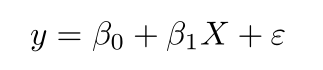

LINEAR REGRESSION COEFFICIENT : [ 7.19156914e-01  2.94848154e-01 -4.93914991e-01  2.30545796e-01
  2.30545796e-01  1.08543387e-06]
LINEAR REGRESSION INTERCEPT:  5.854994231289311
MEAN SUARED ERROR USING LINEAR REGRESSION : 5003.013515026463
MEAN ABSOLUTE ERROR USING LINEAR REGRESSION : 55.62916666419937


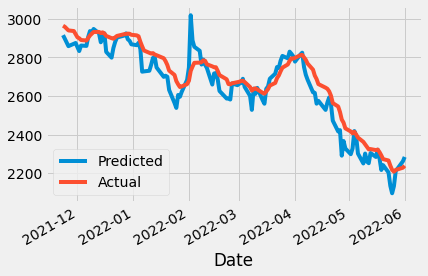

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

reg = LinearRegression()
reg.fit(X_train,y_train)

print("LINEAR REGRESSION COEFFICIENT :",reg.coef_)
print("LINEAR REGRESSION INTERCEPT: ",reg.intercept_)
y_pred=reg.predict(X_test)
print('MEAN SUARED ERROR USING LINEAR REGRESSION :',mean_squared_error(y_pred,y_test))
print('MEAN ABSOLUTE ERROR USING LINEAR REGRESSION :',mean_absolute_error(y_pred,y_test))

predicted_df=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
predicted_df.plot()



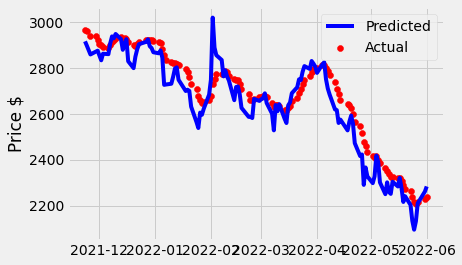

In [31]:
index = predicted_df.index 
line_1 = predicted_df['Predicted'] 
line_2 = predicted_df['Actual'] 
fig, ax = plt.subplots()  
ax.plot(index,line_1, color = 'blue', label = 'Predicted') 
ax.scatter(index,line_2, color = 'red', label = 'Actual') 
ax.legend(loc = 'upper right') 
plt.ylabel('Price $')
plt.show()

**Random Forest Regression**

We will use the sklearn module for training our random forest regression model, specifically the RandomForestRegressor function. The RandomForestRegressor documentation shows many different parameters we can select for our model. Some of the important parameters are highlighted below:

n_estimators — the number of decision trees you will be running in the model
criterion — this variable allows you to select the criterion (loss function) used to determine model outcomes. We can select from loss functions such as mean squared error (MSE) and mean absolute error (MAE). The default value is MSE.
max_depth — this sets the maximum possible depth of each tree

max_features — the maximum number of features the model will consider when determining a split

bootstrap — the default value for this is True, meaning the model follows bootstrapping principles (defined earlier)

max_samples — This parameter assumes bootstrapping is set to True, if not, this parameter doesn’t apply. In the case of True, this value sets the largest size of each sample for each tree.

Other important parameters are min_samples_split, min_samples_leaf, n_jobs, and others that can be read in the sklearn’s RandomForestRegressor documentation here.

In [32]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('MEAN SQUARED ERROR USING RANDOM FOREST REGRESSION',mean_squared_error(y_pred,y_test))
print('MEAN ABSOLUTE ERROR USING RANDOM FOREST REGRESSION',mean_absolute_error(y_pred,y_test))

MEAN SQUARED ERROR USING RANDOM FOREST REGRESSION 6827.372349279951
MEAN ABSOLUTE ERROR USING RANDOM FOREST REGRESSION 68.04839939427735


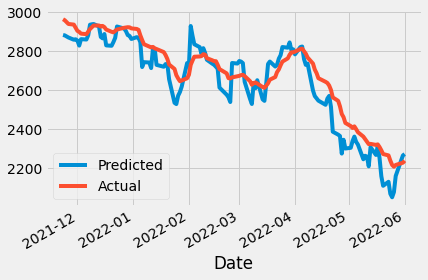

In [33]:
predicted_df=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

predicted_df.plot()

**Decision Tree Regression**

Decision Trees are used for both regression and classification problems. They visually flow like trees, hence the name, and in the regression case, they start with the root of the tree and follow splits based on variable outcomes until a leaf node is reached and the result is given. An example of a decision tree is below:


Image by Author
Here we see a basic decision tree diagram which starts with the Var_1 and splits based off of specific criteria. When ‘yes’, the decision tree follows the represented path, when ‘no’, the decision tree goes down the other path. This process repeats until the decision tree reaches the leaf node and the resulting outcome is decided. For the example below, the values of a, b, c, or d could be representative of any numeric or categorical value.

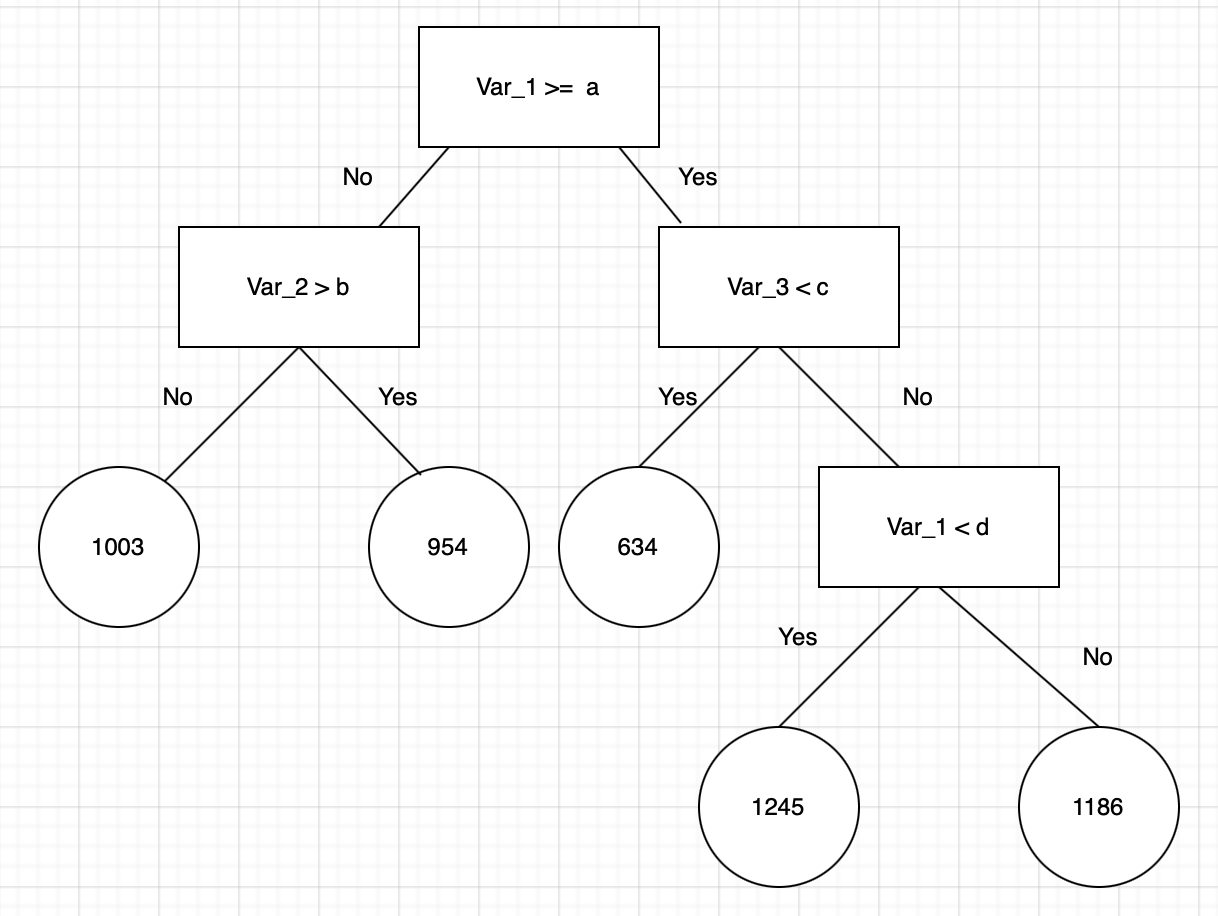

In [34]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('MEAN SQUARED ERROR USING DECISIONTREE REGRESSION :',mean_squared_error(y_pred,y_test))
print('MEAN ABSOLUTE ERROR USING DECISIONTREE REGRESSION :',mean_absolute_error(y_pred,y_test))

MEAN SQUARED ERROR USING DECISIONTREE REGRESSION : 9532.420053731897
MEAN ABSOLUTE ERROR USING DECISIONTREE REGRESSION : 81.53097542308716


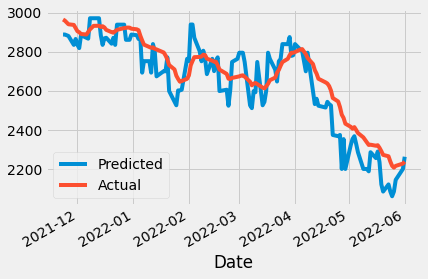

In [35]:
predicted_df=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
predicted_df.plot()

**Support Vector Machines**
 
A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems 

**Support Vectors**
 
Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set.

In [36]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('MEAN SQUARED ERROR USING SVR :',mean_squared_error(y_pred,y_test))
print('MEAN ABSOLUTE ERROR USING SVR :',mean_absolute_error(y_pred,y_test))

MEAN SQUARED ERROR USING SVR : 1196980.0139275456
MEAN ABSOLUTE ERROR USING SVR : 1076.2118264448204


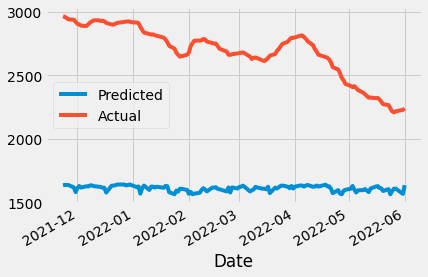

In [37]:
predicted_df=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

predicted_df.plot()

**We can clearly see that Decision tree has the least error so it is considered as our best model to predict the market. Now hyperparameter tuning will be done on decision tree.**
**We tune the model to maximize model performances without overfitting and reduce the variance error in our model. We have to apply the appropriate Hyperparameter technique for our model.**

**HyperParameter Tuning on Decision Tree Regressor**
while working on a dataset and using a Machine Learning model we don't know which set of hyperparameters will give us the best result. Passing all sets of hyperparameters manually through the model and checking the result might be a hectic work and may not be possible to do, To get the best set of hyperparameters we can use Grid Search. Grid Search passes all combinations of hyperparameters one by one into the model and check the result. Finally it gives us the set of hyperparemeters which gives the best result after passing in the model.

## Parameters of Decision tree
**max_depth**

The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. 

**min_samples_split**

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.

**min_samples_leaf**

min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

In [38]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,13],
           "min_samples_leaf":[1,2,3,4,5,6,7,],
            "min_samples_split":[20,50,100,200],
           "max_features":["auto","log2","sqrt",None] }

**From Above parameters we will pick the best pairs**

In [39]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [40]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 1568 candidates, totalling 4704 fits
[CV 1/3] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=20, splitter=best;, score=-159851.102 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=20, splitter=best;, score=-169399.559 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=20, splitter=best;, score=-608353.363 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=20, splitter=random;, score=-214460.195 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=20, splitter=random;, score=-211855.797 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=20, splitter=random;, score=-743245.348 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=50, sp

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [20, 50, 100, 200],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [41]:
tuning_model.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'splitter': 'best'}

**These are the best pairs we got through grid search hyper parameter tuning method**

In [42]:
#now put these parameters into the decsion tree model
tuned_hyper_model= DecisionTreeRegressor(max_depth=13,max_features='log2',min_samples_split=20,min_samples_leaf=3,splitter='best')

In [43]:
# again train model with tunned parameters 
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=13, max_features='log2', min_samples_leaf=3,
                      min_samples_split=20)

In [44]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [45]:
print('MAE:', mean_absolute_error(y_test,tuned_pred))
print('MSE:',mean_squared_error(y_test, tuned_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 78.56697633685677
MSE: 9092.890981634968


**It can be observed that Mean Absolute Error is descreasing with tuning**

In [46]:
predicted_df_goog=pd.DataFrame({'Actual':y_test,'Predicted':tuned_pred})

Text(0, 0.5, 'Closing EMA')

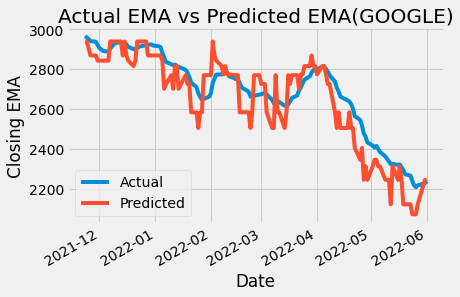

In [47]:
predicted_df_goog.plot()
plt.title('Actual EMA vs Predicted EMA(GOOGLE)')
plt.ylabel('Closing EMA')

**Hyperparametrs have greater impact on the model performance , changing a parameter slighlty can change the behaviour of algorithm which changes the resluts. Decision tree has multiple parametrs so parameter tuning is done on 3 important parametrs, this is done using grid search , we get the best set of parametrs which gives the best score and less  errors. In this case mean absolute error was reduced from 86 to 79, hence we have lesser risk of wrong prediction and it can save the investements.**

## Next Two Days Prediction

Text(0, 0.5, 'Closing EMA')

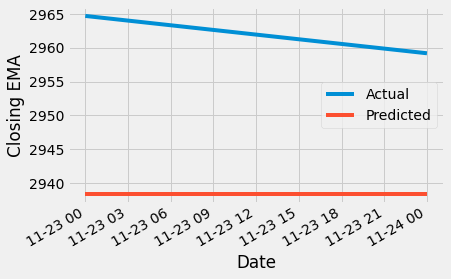

In [48]:
predicted_df_goog[0:2].plot()
plt.ylabel('Closing EMA')

### Weekly Prediction on Google

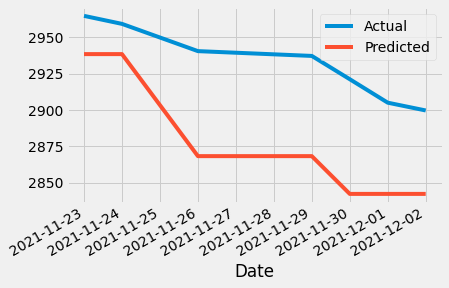

In [49]:
predicted_df_goog[0:7].plot()


## Monthly Prediction Google Stock

Text(0, 0.5, 'Closing EMA')

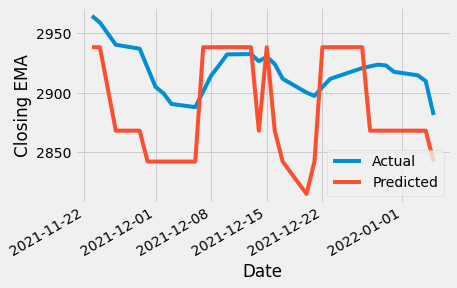

In [50]:
predicted_df_goog[0:30].plot()
plt.ylabel('Closing EMA')

# Prediction on MSFT

In [51]:
import pandas_ta

In [52]:
df_msft.ta.ema(close='close', length=10, append=True)

Date
2019-09-05           NaN
2019-09-06           NaN
2019-09-09           NaN
2019-09-10           NaN
2019-09-11           NaN
                 ...    
2022-05-25    260.970184
2022-05-26    261.866513
2022-05-27    263.934418
2022-05-31    265.377250
2022-06-01    266.399568
Name: EMA_10, Length: 691, dtype: float64

In [53]:
df_msft

,Open,High,Low,Close,Adj Close,Volume,EMA_10
Date,,,,,,,
2019-09-05,139.110001,140.380005,138.759995,140.050003,136.363663,26101800,NaN
2019-09-06,140.029999,140.179993,138.199997,139.100006,135.438675,20824500,NaN
2019-09-09,139.589996,139.750000,136.460007,137.520004,133.900253,25773900,NaN
2019-09-10,136.800003,136.889999,134.509995,136.080002,132.498169,28903400,NaN
2019-09-11,135.910004,136.270004,135.089996,136.119995,132.537125,24726100,NaN
...,...,...,...,...,...,...,...
2022-05-25,258.140015,264.579987,257.130005,262.519989,262.519989,28547900,260.970184
2022-05-26,262.269989,267.109985,261.429993,265.899994,265.899994,25002100,261.866513
2022-05-27,268.480011,273.339996,267.559998,273.239990,273.239990,26889500,263.934418


In [54]:
df_msft = df_msft.iloc[10:]

In [55]:
# Split data into testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(df[['adj_close']], df[['EMA_10']], test_size=.2)

In [56]:
# convert close to log of close to remove skewness
#df_msft['Close']=df_msft['Close'].apply(lambda x:np.log(x))
#df_msft['month']=df_msft.index.month
#df_msft['day']=df_msft.index.day
#df_msft['year']=df_msft.index.year
#df_msft=df_msft[['Close','year','month','day']]
#input output split
X =df_msft.drop(columns=['EMA_10'])
y = df_msft['EMA_10']

X_train=X[0:550]
X_test=X[550:]
y_train=y[0:550]
y_test=y[550:]

In [57]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('mean squared error using Random Forest regression',mean_squared_error(y_pred,y_test))
print('mean absolute error using RandomForest regression',mean_absolute_error(y_pred,y_test))

mean squared error using Random Forest regression 79.04333503187011
mean absolute error using RandomForest regression 7.025087165087996


Text(0, 0.5, 'Closing EMA')

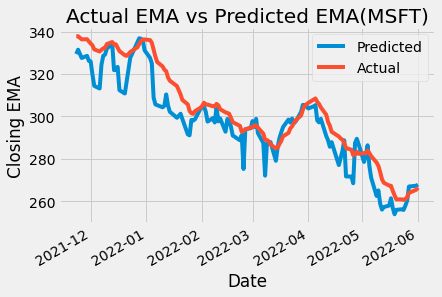

In [58]:
predicted_df_msft=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
predicted_df_msft.plot()
plt.title('Actual EMA vs Predicted EMA(MSFT)')
plt.ylabel('Closing EMA')

**Lower Mean Square Error is obtained as it was with GOOG**

## Weekly Prediction on Msft

Text(0, 0.5, 'Closing EMA')

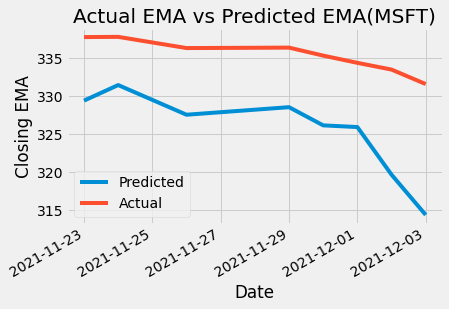

In [59]:
predicted_df_msft[0:8].plot()
plt.title('Actual EMA vs Predicted EMA(MSFT)')
plt.ylabel('Closing EMA')

## Monthly Prediction MSFT

Text(0, 0.5, 'Closing EMA')

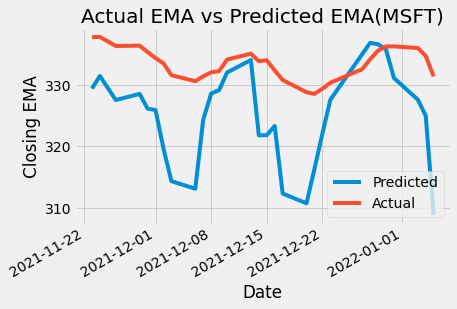

In [60]:
predicted_df_msft[0:30].plot()
plt.title('Actual EMA vs Predicted EMA(MSFT)')
plt.ylabel('Closing EMA')

# TSLA

In [61]:
df_tsla.ta.ema(close='close', length=10, append=True)

Date
2019-09-05           NaN
2019-09-06           NaN
2019-09-09           NaN
2019-09-10           NaN
2019-09-11           NaN
                 ...    
2022-05-25    704.151557
2022-05-26    704.802180
2022-05-27    714.770875
2022-05-31    722.677991
2022-06-01    725.060179
Name: EMA_10, Length: 691, dtype: float64

In [62]:
df_tsla = df_tsla.iloc[10:]

In [63]:

#input output split
X =df_tsla.drop(columns=['EMA_10'])
y = df_tsla['EMA_10']

X_train=X[0:600]
X_test=X[600:]
y_train=y[0:600]
y_test=y[600:]

In [64]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('mean squared error using Random Forest regression',mean_squared_error(y_pred,y_test))
print('mean absolute error using RandomForest regression',mean_absolute_error(y_pred,y_test))

mean squared error using Random Forest regression 2801.025915706214
mean absolute error using RandomForest regression 41.53648295364851


Text(0, 0.5, 'Closing EMA')

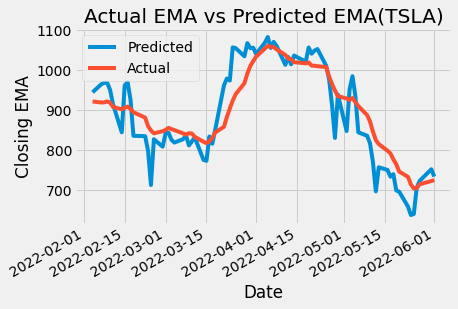

In [65]:
predicted_df_tsla=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
predicted_df_tsla.plot()
plt.title('Actual EMA vs Predicted EMA(TSLA)')
plt.ylabel('Closing EMA')

**From the prediction results of last month data it can be observed that Google has descreasing trends at the end of the month , if you are short term investor you can go for it as it is possible to invest in both direction. Slight increase in the trend is noted in telsa at the end of fifth month, low close is observed in the case of MSFT as well at the last week of the month.**

## Results calculated

In [66]:
predicted_df_msft

,Predicted,Actual
Date,,
2021-11-23,329.394288,337.754443
2021-11-24,331.442800,337.782726
2021-11-26,327.539659,336.309502
2021-11-29,328.534041,336.367775
2021-11-30,326.140232,335.317270
...,...,...
2022-05-25,257.898806,260.970184
2022-05-26,260.266642,261.866513
2022-05-27,266.921864,263.934418


In [67]:
predicted_df_msft['Open_msft']=df_msft['Open'][600:]
predicted_df_msft=predicted_df_msft.drop("Actual",axis=1)
predicted_df_msft=predicted_df_msft.rename({'Predicted':'Predicted_Close_msft'},axis=1)
predicted_df_msft['Trading'] = np.where(predicted_df_msft.Predicted_Close_msft > predicted_df_msft.Open_msft,'Yes', 'NO')
predicted_df_msft

,Predicted_Close_msft,Open_msft,Trading
Date,,,
2021-11-23,329.394288,NaN,NO
2021-11-24,331.442800,NaN,NO
2021-11-26,327.539659,NaN,NO
2021-11-29,328.534041,NaN,NO
2021-11-30,326.140232,NaN,NO
...,...,...,...
2022-05-25,257.898806,258.140015,NO
2022-05-26,260.266642,262.269989,NO
2022-05-27,266.921864,268.480011,NO


In [68]:
predicted_df_goog['Open_goog']=df_google['Open'][600:]
predicted_df_goog=predicted_df_goog.drop("Actual",axis=1)
predicted_df_goog=predicted_df_goog.rename({'Predicted':'Predicted_Close_goog'},axis=1)
predicted_df_goog['Trading'] = np.where(predicted_df_goog.Predicted_Close_goog > predicted_df_goog.Open_goog,'Yes', 'NO')
predicted_df_goog

,Predicted_Close_goog,Open_goog,Trading
Date,,,
2021-11-23,2938.392287,NaN,NO
2021-11-24,2938.392287,NaN,NO
2021-11-26,2868.213777,NaN,NO
2021-11-29,2868.213777,NaN,NO
2021-11-30,2842.238432,NaN,NO
...,...,...,...
2022-05-25,2071.501352,2102.840088,NO
2022-05-26,2071.501352,2121.010010,NO
2022-05-27,2121.486162,2195.770020,NO


In [69]:
predicted_df_tsla['Open_tsla']=df_tsla['Open'][600:]
predicted_df_tsla=predicted_df_tsla.drop("Actual",axis=1)
predicted_df_tsla=predicted_df_tsla.rename({'Predicted':'Predicted_Close_tsla'},axis=1)
predicted_df_tsla['Trading'] = np.where(predicted_df_tsla.Predicted_Close_tsla > predicted_df_tsla.Open_tsla,'Yes', 'NO')

In [70]:
predicted_df_tsla

,Predicted_Close_tsla,Open_tsla,Trading
Date,,,
2022-02-04,944.716673,897.219971,Yes
2022-02-07,964.827510,923.789978,Yes
2022-02-08,968.261576,905.530029,Yes
2022-02-09,968.613285,935.000000,Yes
2022-02-10,950.690161,908.369995,Yes
...,...,...,...
2022-05-25,640.482380,623.849976,Yes
2022-05-26,706.338458,661.419983,Yes
2022-05-27,723.033388,723.250000,NO


## Investement Method
**In our case it is better to invest when predicted closing price is higher than the open as it will return profit for the investors.
But taking in a realistic way, it will always be that with these predicted values, other factors such as social and economical influences which are not included in the model also have a big impact on the market. See covid-19, so if we would use along with predicted open and close price other factors into account, a person could make profitable investements**